In [89]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

## Scipy

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.<br>
1.fitting it to the periodic function<br>
2.plot the fit<br>
Data<br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 <br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [90]:
import warnings
warnings.filterwarnings('ignore')
from scipy import optimize 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [91]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(len(Max))

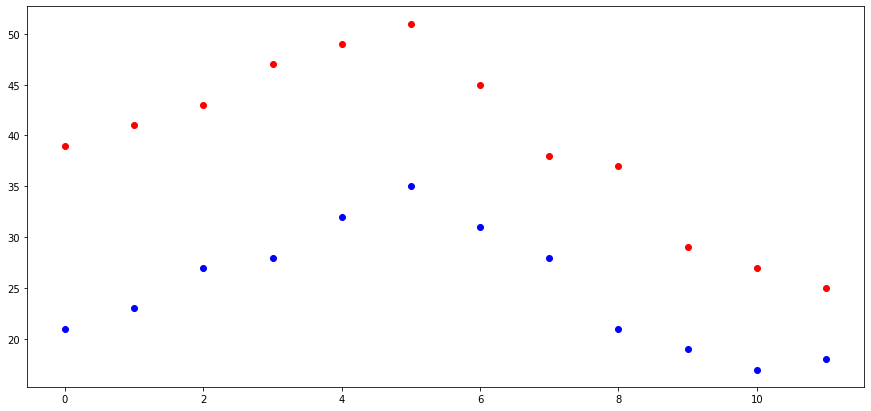

In [92]:
plt.plot(months, Max, 'ro')
plt.plot(months, Min, 'bo');

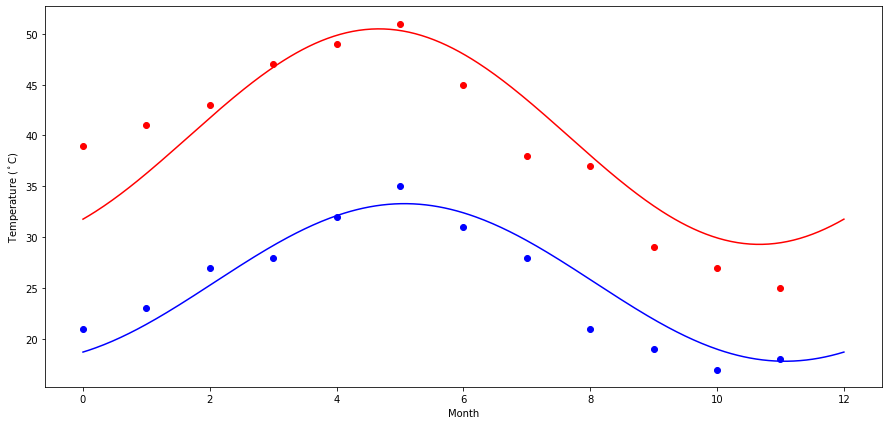

In [93]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, Min, [20, 10, 0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months,  Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Matplotlib

titanic = pd.read_csv(url)<br>
Charts to plot:<br>
1. Create a pie chart presenting the male/female proportion<br>
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender<br>

In [94]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


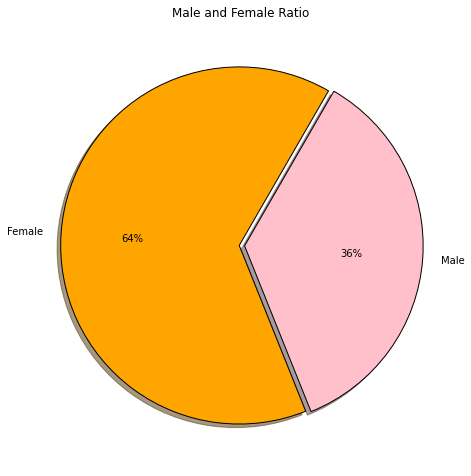

In [95]:
plt.rcParams["figure.figsize"] = (8,10)
fig = plt.pie(titanic.sex.value_counts(), autopct = "%1.0f%%",labels=["Female","Male"], startangle = 60,
                        wedgeprops={"linewidth":1,"edgecolor":"k"}, colors = ['Orange', 'Pink'],
                        explode=[.01,.02],shadow =True)
plt.title('Male and Female Ratio');

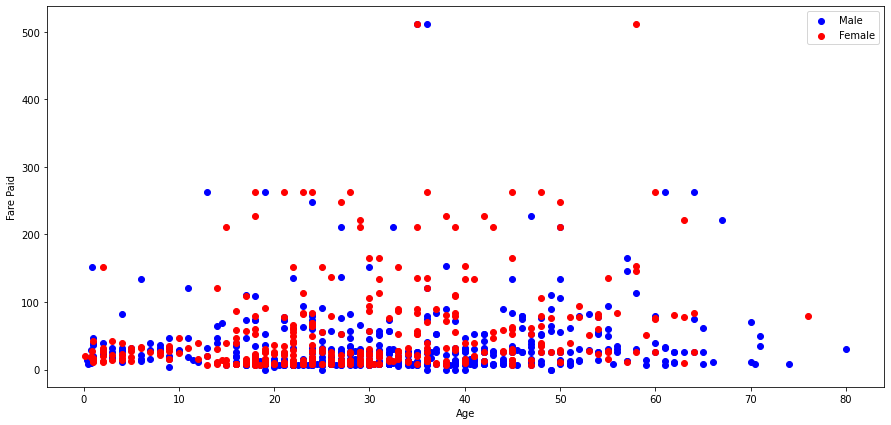

In [96]:
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter(titanic[titanic.sex == 'male'].age, titanic[titanic.sex == 'male'].fare, color = ['Blue'])
plt.scatter(titanic[titanic.sex == 'female'].age, titanic[titanic.sex == 'female'].fare, color = ['Red'])
plt.legend(['Male', 'Female'])
plt.xlabel('Age')
plt.ylabel('Fare Paid');